# Quais os imóveis que House Rocket deveriam comprar?
- coletador os dados no kangle
- agrupar por região (zipcode)
- Dentro de cada região, vou fazer a mediana dos preços dos imóveis
- E entao sugerir a compra dos imóveis que estão abaixo do valor dessa mediana e com boas condições de compra.

- Exemlo de Tabela:
    Imóvel Cód Região\ Preço do Imóvel \ Preço da Mediana \ Condição\ Status:
    328545            \ 450 mil         \ 500 mil         \ boa     \Compra
    48578              \625 mil          \ 500 mil        \boa     \ Não Compra
    58789              \358 mil           \ 485 mil       \Não      \Não Compra 



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import gridspec
from IPython.core.display import HTML 

In [ ]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [47]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('./kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df['yr_renovated'].sort_values(ascending=True).unique()

array([   0, 1934, 1940, 1944, 1945, 1946, 1948, 1950, 1951, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1962, 1963, 1964, 1965, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015])

In [5]:
# conventando em datetime as datas
df['date'] = pd.to_datetime(df['date'])

#df['yr_built'].pd.to_datetime(df['yr_built']).dt.strftime('%Y-%m-%d')
df['yr_built']= pd.to_datetime(df['yr_built'],format= '%Y')

df['price'].median()


450000.0

In [6]:
#df.loc[df1['waterfront']==1]

#houses= len(df.loc[df['waterfront']==0,['id','bathrooms']])

# H1: Imóveis que possuem vista para água, são 30% mais caros, na média.
# H2: Imóveis com data de construção menor que 1955, são 50% mais baratos, na média.
# H3: Imóveis sem porão possuem sqrt_lot, são 50%
# maiores do que com porão.
# H4: O crescimento do preço dos imóveis YoY ( Year over Year ) é de 10%
# H5: Imóveis com 3 banheiros tem um crescimento MoM
# H6: Casas reformadas depois do ano 2000 são 25% mais caras
# H7: Casas localizadas com zipcode 98003, são 15% mais baratas
# H8: Casas que tem uma nota maior, são as que contém mais quartos
# H9: Casas que tem uma sala maior, são 20% mais caras
# H10: O crescimento do preços dos imóveis com vista para água YoY é de 8% 

In [6]:
# estastiticas das hipoteses:
#waterfront , zipcode, yr_built, sqft_lot,date, bathrooms, bedrooms, price, floors
df_zipcode = df[['zipcode','id']].groupby('zipcode').count().reset_index()
df_waterfront = df[['waterfront','zipcode']].groupby('zipcode').median().reset_index()
df_price = df[['zipcode','price']].groupby('zipcode').median().reset_index()
df_yr_built= df[['zipcode','yr_built']].groupby('zipcode').median().reset_index()
df_sqft_lot = df[['zipcode','sqft_lot']].groupby('zipcode').median().reset_index()
df_bedrooms = df[['zipcode','bedrooms']].groupby('zipcode').median().reset_index()
df_bathrooms = df[['zipcode','bathrooms']].groupby('zipcode').median().reset_index()
df_floors = df[['zipcode','floors']].groupby('zipcode').median().reset_index()
df_sqft_basement = df[['zipcode','sqft_basement']].groupby('zipcode').median().reset_index()

df_sqft_basement.head()

,zipcode,sqft_basement
0,98001,0.0
1,98002,0.0
2,98003,0.0
3,98004,0.0
4,98005,305.0


In [7]:
# tabela de medianas
m1 = pd.merge(df_waterfront,df_price, on='zipcode', how='inner')
m2 = pd.merge(m1,df_yr_built,on='zipcode',how='inner')
m3 = pd.merge(m2,df_sqft_lot,on='zipcode', how='inner')
m4 = pd.merge(m3, df_bedrooms, on= 'zipcode', how='inner')
m5 = pd.merge(m4, df_bathrooms, on='zipcode', how='inner')
m6 = pd.merge(m5,df_zipcode,on='zipcode',how='inner')
m7 = pd.merge(m6,df_sqft_basement, on='zipcode',how='inner')
df1 = pd.merge(m7, df_floors, on='zipcode', how='inner')

df1.head(4)

,zipcode,waterfront,price,yr_built,sqft_lot,bedrooms,bathrooms,id,sqft_basement,floors
0,98001,0.0,260000.0,1981-01-01,9287.0,3.0,2.00,362,0.0,1.0
1,98002,0.0,235000.0,1966-01-01,7282.0,3.0,1.75,199,0.0,1.0
2,98003,0.0,267475.0,1975-01-01,8816.0,3.0,2.00,280,0.0,1.0
3,98004,0.0,1150000.0,1965-01-01,11119.0,4.0,2.50,317,0.0,1.0


In [8]:
#renomoeando as colunas
df1.columns=['ZIPCODE','IS_WATERFRONT','PRICE','YR_BUILT','SQFT_LOT','BEDROOMS','BATHROOMS','ID','BASEMENT','FLOORS']
df1.head(3)

#df1['ZIPCODE'].iloc[0]

,ZIPCODE,IS_WATERFRONT,PRICE,YR_BUILT,SQFT_LOT,BEDROOMS,BATHROOMS,ID,BASEMENT,FLOORS
0,98001,0.0,260000.0,1981-01-01,9287.0,3.0,2.00,362,0.0,1.0
1,98002,0.0,235000.0,1966-01-01,7282.0,3.0,1.75,199,0.0,1.0
2,98003,0.0,267475.0,1975-01-01,8816.0,3.0,2.00,280,0.0,1.0


In [9]:
#help function 

def acrescimo (valor,porcentagem):
    y = valor
    x = porcentagem /100
    valor_final = y + (valor * x)
    
    return valor_final

In [10]:
df1['PRICE'].median()

447975.0

In [11]:
#imoveis c/ vista para água são + caras em 30% na média

# MÉDIA DE PREÇOS DAS CASAS C/ VISTA P/ ÁGUA
# DEFINIDO O BASELINE - TEMOS QUE COMPARAR C/ O VALOR ESTIMADO
# COM ISSO TEREMOS A REPOSTA SE A HIPOTÉSE É VERDADEIRA OU FALSA:

baseline = df1['PRICE'].median() 

media_acrescida=  acrescimo(valor= baseline,porcentagem=30)

print(baseline)
print(media_acrescida)
#df1['MAIS_CARO']= df1['PRICE'].apply(lambda x: 'Verdadeiro' if (x>= baseline) & (df1.loc['IS_WATERFRONT']==0)  else 'Falso')

for i in range(len(df1)):
    if (df1.loc[i,'PRICE'] > media_acrescida) & (df1.loc[i,'IS_WATERFRONT']==1):
        df1.loc[i,'RESULTADO'] = 'sim'
    else:
        df1.loc[i,'RESULTADO']= 'não'

df1.head(4)


447975.0
582367.5


,ZIPCODE,IS_WATERFRONT,PRICE,YR_BUILT,SQFT_LOT,BEDROOMS,BATHROOMS,ID,BASEMENT,FLOORS,RESULTADO
0,98001,0.0,260000.0,1981-01-01,9287.0,3.0,2.00,362,0.0,1.0,não
1,98002,0.0,235000.0,1966-01-01,7282.0,3.0,1.75,199,0.0,1.0,não
2,98003,0.0,267475.0,1975-01-01,8816.0,3.0,2.00,280,0.0,1.0,não
3,98004,0.0,1150000.0,1965-01-01,11119.0,4.0,2.50,317,0.0,1.0,não


In [12]:
# forma utilizando filtro
preco_mediano= df1.loc[df1['IS_WATERFRONT']==0, ['PRICE']].median()

com_vista = len(df1.loc[(df1['PRICE']> media_acrescida) & (df1['IS_WATERFRONT']==1)])
sem_vista= len(df1.loc[(df1['PRICE']> media_acrescida) & (df1['IS_WATERFRONT']==0),['PRICE','IS_WATERFRONT','ZIPCODE']])

print('A Hipotése é inválida. Pois há {} contra {}.Com isso é possível ver que o número de casas com \n esse perfil é maior'.format(sem_vista,com_vista))

A Hipotése é inválida. Pois há 17 contra 0.Com isso é possível ver que o número de casas com 
 esse perfil é maior


In [13]:
no = len(df1.loc[df1['RESULTADO']=='não'])
yes= len(df1.loc[df1['RESULTADO']=='sim'])



print('A hipotéses de casas com vista para água ser um valor médio de 30% mais elevado é Falso.\n Pois dentro dessas condições há {}, contra {} que não contém vista para o mar'.format(no,yes))

A hipotéses de casas com vista para água ser um valor médio de 30% mais elevado é Falso.
 Pois dentro dessas condições há 70, contra 0 que não contém vista para o mar


In [15]:
#H2: Imóveis com data de construção menor que 1955, são 50% mais baratos, na média
# selecionar coluna mediana de construção (yr_built)
# saber o preço médiano dos imóveis desse perfil (fazer um filtro)
# fazer estrutura de repetição que compare essa condição do imóvel


In [14]:
antes = df1.loc[df1['YR_BUILT']<'1955',['YR_BUILT','PRICE']].median(numeric_only=True)

depois = df1.loc[df1['YR_BUILT']>'1955',['YR_BUILT','PRICE']].median(numeric_only=True)

print(depois /2)


#print(descontado)
#antes

PRICE    220000.0
dtype: float64


In [15]:
b = len(df1.loc[(df1['YR_BUILT']< pd.to_datetime('1955-01-01')) & (df1['PRICE']< 220000.0),['YR_BUILT','PRICE']])


a = len(df1.loc[(df1['YR_BUILT']> pd.to_datetime('1955-01-01')) & (df1['PRICE']> 220000.0),['YR_BUILT','PRICE']])



print('Há {} casas com esse perfil e {} com esse perfil. Portando hipotese invalida'.format(a,b))

Há 46 casas com esse perfil e 0 com esse perfil. Portando hipotese invalida


In [16]:
# tabela de recomendação de compra
for i in range(len(df1)):
    if (df1.loc[i,'YR_BUILT']< pd.to_datetime('1955-01-01')) & (df1.loc[i,'PRICE']< 220000.0):
        df1.loc[i,'STATUS_PRECO'] = 'barato'
    
    elif (df1.loc[i,'YR_BUILT']> pd.to_datetime('1955-01-01')) & (df1.loc[i,'PRICE']< 220000.0):
         df1.loc[i,'STATUS_PRECO'] = 'talvez'
            
    elif (df1.loc[i,'YR_BUILT']> pd.to_datetime('1955-01-01')) & (df1.loc[i,'PRICE']> 220000.0):
        df1.loc[i,'STATUS_PRECO'] = 'talvez'
    else:
        df1.loc[i,'STATUS_PRECO'] = 'caro'

len(df1.loc[df1['STATUS_PRECO']=='talvez'])
#len(df1.loc[df1['STATUS_PRECO']=='caro'])
df1.head()

,ZIPCODE,IS_WATERFRONT,PRICE,YR_BUILT,SQFT_LOT,BEDROOMS,BATHROOMS,ID,BASEMENT,FLOORS,RESULTADO,STATUS_PRECO
0,98001,0.0,260000.0,1981-01-01,9287.0,3.0,2.000,362,0.0,1.0,não,talvez
1,98002,0.0,235000.0,1966-01-01,7282.0,3.0,1.750,199,0.0,1.0,não,talvez
2,98003,0.0,267475.0,1975-01-01,8816.0,3.0,2.000,280,0.0,1.0,não,talvez
3,98004,0.0,1150000.0,1965-01-01,11119.0,4.0,2.500,317,0.0,1.0,não,talvez
4,98005,0.0,765475.0,1967-01-01,12220.0,4.0,2.375,168,305.0,1.0,não,talvez


In [17]:

after = len(df1.loc[df1['STATUS_PRECO']=='caro'])

before = len(df1.loc[df1['STATUS_PRECO']=='barato'])

print('A hipotese de casas construidas de 1955 com preço menor é invalida, pois \n há {} com esse perfil'.
      format(before))


A hipotese de casas construidas de 1955 com preço menor é invalida, pois 
 há 0 com esse perfil


H3: Imóveis sem porão possuem sqrt_lot, são 50%¶
maiores do que com porão.

 -- selecionar a coluna casas c/metragem mediana c/porão (BASEMENT)
 -- selecionar a coluna sqrt_lot
 -- fazer uma comparação entre casas c/ e s/ porão

In [19]:
#filtrando os imóveis

#com porão (basement)
aux1 = df1.loc[df1['BASEMENT']==0,['SQFT_LOT']].median()

#sem porão (basement)
aux2 = df1.loc[df1['BASEMENT']!= 0,['SQFT_LOT']].median()

#calculo da diferença %
diferenca = np.round((( 8681-5065) / 5065) *100,(2))
diferenca

print('A Hipotése é invalida. Pois as casas sem porão são em média {} maiores do que imóveis sem porão'.
      format(diferenca))

A Hipotése é invalida. Pois as casas sem porão são em média 71.39 maiores do que imóveis sem porão


## H4: O crescimento do preço dos imóveis YoY ( Year over Year ) é de 10%

In [44]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


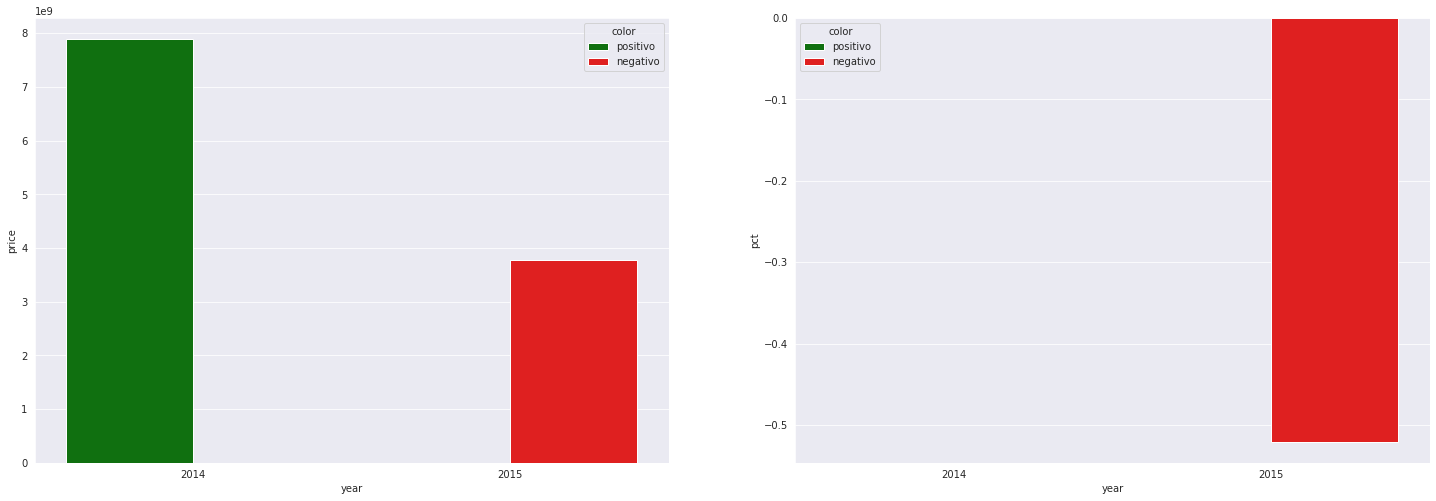

In [21]:
#grid = GridSpedc(1,1) 

# separando a data por ano
df['year'] = pd.to_datetime(df['date']).dt.year

# separando, agrupando e somando os valores dos respectivos anos do DF
by_year = df[['price','year']].groupby('year').sum().reset_index()


# fazendo o calculo % utilizndo função do pandas pct._charge() para calcular a diferença do ano para outro
by_year['pct'] = by_year['price'].pct_change()

#criando coluna para indentificar quais são os anos negativos e positivo
by_year['color'] = by_year['pct'].apply(lambda x: 'negativo' if x<0 else 'positivo')

# ===== montagem do gráfico ======= #
# tamanho do gŕafico
fig = plt.figure(figsize=(25,18))
# estilo do gráfico
sns.set_style('darkgrid') 

# selecionado as cores do gráfico
color = ['green','red'] 

#plotando o gráfico 
plt.subplot(2,2,1)
sns.barplot(x = 'year', y = 'price',hue = 'color', palette = color, data= by_year);

plt.subplot(2,2,2)
sns.barplot(x= 'year', y = 'pct', data= by_year, hue ='color',palette = color);
#sns.barplot(x= 'year', y = 'pct', data= by_year, hue ='color',palette = color);

plt.show()

## H5: Imóveis com 3 banheiros tem um crescimento MoM

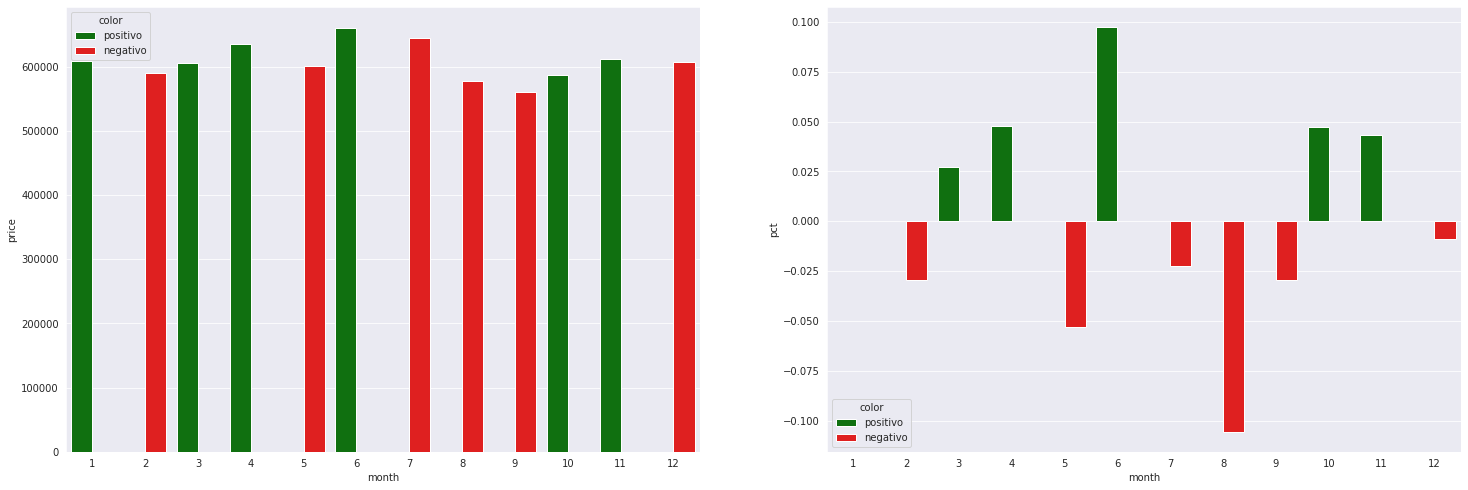

In [31]:
df['month'] = df['date'].dt.month

df_aux = df.loc[df['bathrooms']==3]


#df_aux = df[df['bathrooms']==3].reset_index()

df_aux1 =df_aux[['price','month','bathrooms']].groupby('month').median().reset_index()



# fazendo o calculo % utilizndo função do pandas pct._charge() para calcular a diferença do ano para outro
df_aux1['pct'] = df_aux1['price'].pct_change()


df_aux1['color'] = df_aux1['pct'].apply(lambda x: 'negativo' if x<0 else 'positivo')

# ===== montagem do gráfico ======= #
# tamanho do gŕafico
fig = plt.figure(figsize=(25,18))

sns.set_style('darkgrid') 

# selecionado as cores do gráfico
color2 = ['green','red'] 


plt.subplot(2,2,1)
sns.barplot( x = 'month', y = 'price', hue='color',palette=color2, data= df_aux1);


plt.subplot(2,2,2)
sns.barplot( x= 'month', y = 'pct',hue ='color',palette = color2, data= df_aux1);

### Hipotese 5 é falso. Pois como desmonstrado no gráfico 2 é possível notar que não há um crescimento mês a mês de 10% imóveis com 3 banheiros.

# H6: Casas reformadas depois do ano 2000 são mais caras

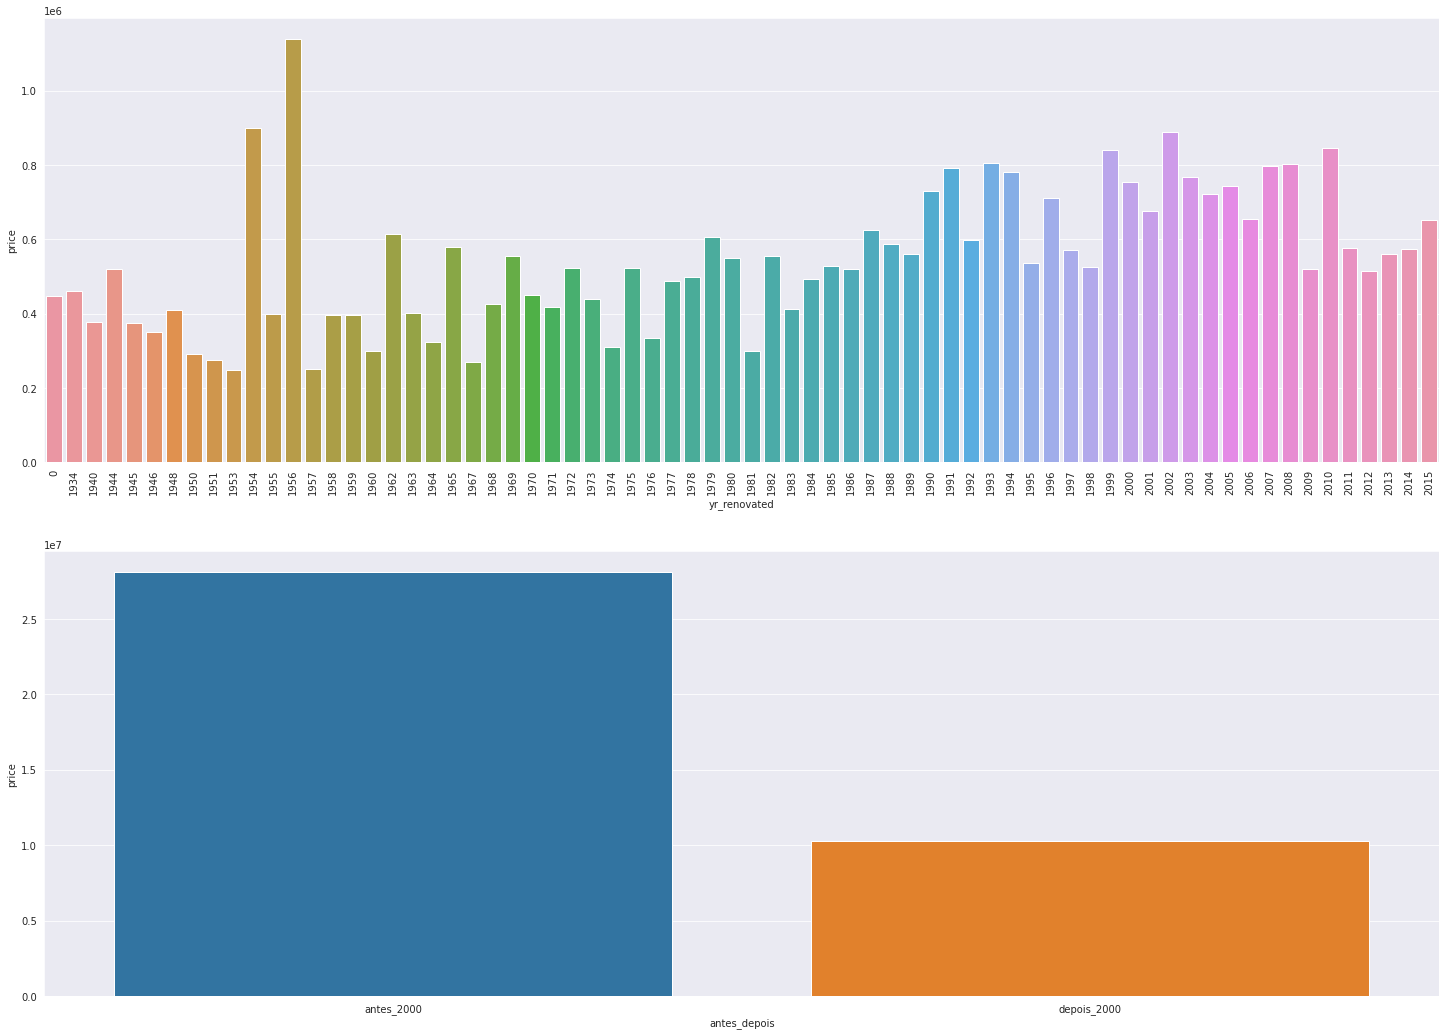

In [74]:
# selecionar a coluna das reformas (yr_reformed) e preço(price)
# agrupar e fazer a mediana do valor de todas as casas
# fazer um filtro dos anos anos (usando lambda / antes de 2000 e depois de 2000)
# achar um gráfico de comparação entre os períodos 

fig = plt.figure(figsize=(25,18))


df_filtro = df[['yr_renovated','price']].groupby('yr_renovated').median().reset_index()


df_filtro['antes_depois'] = df_filtro['yr_renovated'].apply(lambda x: 'antes_2000' if x<= 2000 else 'depois_2000')

aux_reforma= df_filtro[['antes_depois','price']].groupby('antes_depois').sum().reset_index()

plt.subplot(2,1,1)

sns.barplot(x = 'yr_renovated', y= 'price', data = df_filtro);
plt.xticks(rotation =90);

plt.subplot(2,1,2)
sns.barplot( x = 'antes_depois', y= 'price', data = aux_reforma);

